# Tutorial 6: Convolutional neural networks
### March 9, 2023

In [ ]:
conda install pytorch torchvision torchaudio -c pytorch

In [2]:
## Importing libraries
import numpy as np
import torch

## Step 1: Prepping data set
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Step 2: Building the model
import torch.nn as nn
import torch.nn.functional as F

## Step 3: Training the model
import torch.optim as optim

### Step 1: Preparing the data set
- Splitting the images into train and test sets
- Preprocessing the images (normalizing speeds up learning)

In [3]:
## Downloading, splitting, and preprocessing the images
transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


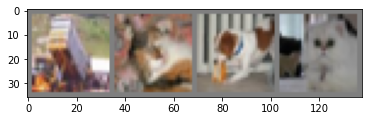

truck   cat   dog   cat


In [7]:
## Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.ion()
    plt.show()

## Getting some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

## Showing images
imshow(torchvision.utils.make_grid(images))

## Printing image labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Step 2: Building the network

In [8]:
## Defining the network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)   # first convolutional layer
        self.pool = nn.MaxPool2d(2, 2)    # max pooling layer
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [9]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### Step 3: Training the network

In [14]:
## Defining loss function and optimizer (cross-entropy loss and SGD with momentum)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

## Training the model
for epoch in range(5):  # loop over the dataset multiple times (5 epochs)

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# save trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

[1,  2000] loss: 1.035
[1,  4000] loss: 1.025
[1,  6000] loss: 1.035
[1,  8000] loss: 1.061
[1, 10000] loss: 1.031
[1, 12000] loss: 1.041
[2,  2000] loss: 0.955
[2,  4000] loss: 0.987
[2,  6000] loss: 0.996
[2,  8000] loss: 0.982
[2, 10000] loss: 1.011
[2, 12000] loss: 0.982
[3,  2000] loss: 0.915
[3,  4000] loss: 0.916
[3,  6000] loss: 0.943
[3,  8000] loss: 0.935
[3, 10000] loss: 0.958
[3, 12000] loss: 0.976
[4,  2000] loss: 0.847
[4,  4000] loss: 0.886
[4,  6000] loss: 0.897
[4,  8000] loss: 0.913
[4, 10000] loss: 0.908
[4, 12000] loss: 0.941
[5,  2000] loss: 0.835
[5,  4000] loss: 0.852
[5,  6000] loss: 0.831
[5,  8000] loss: 0.874
[5, 10000] loss: 0.893
[5, 12000] loss: 0.912
Finished Training


### Testing the network

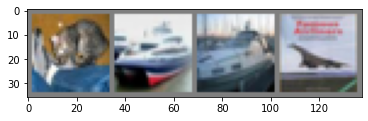

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane
Accuracy of the network on the 10000 test images: 61 %
Accuracy of plane : 68 %
Accuracy of   car : 79 %
Accuracy of  bird : 42 %
Accuracy of   cat : 47 %
Accuracy of  deer : 56 %
Accuracy of   dog : 43 %
Accuracy of  frog : 72 %
Accuracy of horse : 66 %
Accuracy of  ship : 82 %
Accuracy of truck : 59 %


In [18]:
## Displaying images from test set
dataiter = iter(testloader)
images, labels = next(dataiter)

## Printing images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Loading trained network (only needed if you exited ipython after training)
net = Net()
net.load_state_dict(torch.load(PATH))

## Getting object categories predicted by the network
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

## Computing accuracy on the full test data set (10,000 images)
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

## Investigating performance per object categoryclass_correct = list(0. for i in range(10))
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Next things to try:
- Remove the non-linear activations functions (i.e., remove relu from forward() function) --> worse performance
- Alter learning rate
- 